# In order to optimize our inventory, we would like to know if  August rentals >= July rentals for every movie?

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

In [3]:
july_rentals=pd.read_csv('/Users/devirughani/Desktop/IronHack/Week_3/Day_4/Labs/july_rentals.csv')

In [4]:
august_rentals=pd.read_csv('/Users/devirughani/Desktop/IronHack/Week_3/Day_4/Labs/august_rentals.csv')

In [5]:
july_rentals=july_rentals.rename(columns={'Num_film_rentals': 'July_Rentals','Average Rental Duration': 'July_Average_Rental_Duration'})
july_rentals.head()
august_rentals=august_rentals.rename(columns={'Num_film_rentals': 'August_Rentals','Average Rental Duration': 'Aug_Average_Rental_Duration'})
august_rentals.head()

,film_id,length,rating,Aug_Average_Rental_Duration,August_Rentals,Rental_month,Category
0,1,86,PG,6,9,8,Documentary
1,2,48,G,3,4,8,Horror
2,3,50,NC-17,7,6,8,Documentary
3,4,117,G,5,6,8,Horror
4,5,130,G,6,3,8,Family


In [6]:
data=pd.concat([july_rentals, august_rentals], axis=1)

#data = july_rentals.merge(august_rentals, how='inner')
#data = data.drop(['Rental_month_x','film_id_y','length_y','rating_y','Rental_month_y','Category_y'], axis=1)


data=data.loc[:,~data.columns.duplicated()]
data=data.drop(['Rental_month','Aug_Average_Rental_Duration'], axis=1)

column_names = ["film_id","Category","rating","length", "July_Average_Rental_Duration", "July_Rentals","August_Rentals"]

data = data.reindex(columns=column_names)

#data.head(20)

data.head(20)

,film_id,Category,rating,length,July_Average_Rental_Duration,July_Rentals,August_Rentals
0,1,Documentary,PG,86,6,9,9
1,2,Horror,G,48,3,2,4
2,3,Documentary,NC-17,50,7,4,6
3,4,Horror,G,117,5,12,6
4,5,Family,G,130,6,5,3
5,6,Foreign,PG,169,3,7,9
6,7,Comedy,PG-13,62,6,6,7
7,8,Horror,R,54,6,7,5
8,9,Horror,PG-13,114,3,7,5
9,10,Sports,NC-17,63,6,8,11


In [7]:
more_than_august = data['August_Rentals']>=data['July_Rentals']

more_than_august

0       True
1       True
2       True
3      False
4      False
       ...  
953     True
954     True
955    False
956     True
957    False
Length: 958, dtype: bool

In [8]:
data['More_in_August?']= list(more_than_august)
data.head()

,film_id,Category,rating,length,July_Average_Rental_Duration,July_Rentals,August_Rentals,More_in_August?
0,1,Documentary,PG,86,6,9,9,True
1,2,Horror,G,48,3,2,4,True
2,3,Documentary,NC-17,50,7,4,6,True
3,4,Horror,G,117,5,12,6,False
4,5,Family,G,130,6,5,3,False


In [9]:
predict_column=data[['More_in_August?']]
predict_column

,More_in_August?
0,True
1,True
2,True
3,False
4,False
...,...
953,True
954,True
955,False
956,True


## Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables

In [10]:
data.dtypes

film_id                          int64
Category                        object
rating                          object
length                           int64
July_Average_Rental_Duration     int64
July_Rentals                     int64
August_Rentals                   int64
More_in_August?                   bool
dtype: object

In [11]:
features = data.drop(['film_id', 'August_Rentals','More_in_August?'], axis=1)
features

,Category,rating,length,July_Average_Rental_Duration,July_Rentals
0,Documentary,PG,86,6,9
1,Horror,G,48,3,2
2,Documentary,NC-17,50,7,4
3,Horror,G,117,5,12
4,Family,G,130,6,5
...,...,...,...,...,...
953,Documentary,G,183,6,3
954,Music,NC-17,179,4,2
955,Horror,NC-17,105,6,3
956,Children,R,101,5,7


In [12]:
y = data['More_in_August?']
X = features

In [13]:
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Numpy arrays. Below convert.

In [14]:
#Make actor_id categorical


In [15]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)


X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = np.object)
X_test_cat  = X_test_df.select_dtypes(include = np.object)

/var/folders/mw/6447zlmn5h9_r3fs75_lzjgm0000gn/T/ipykernel_33845/3922448791.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train_df.select_dtypes(include = np.object)
/var/folders/mw/6447zlmn5h9_r3fs75_lzjgm0000gn/T/ipykernel_33845/3922448791.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat  = X_test_df.select_dtypes(include = np.object)


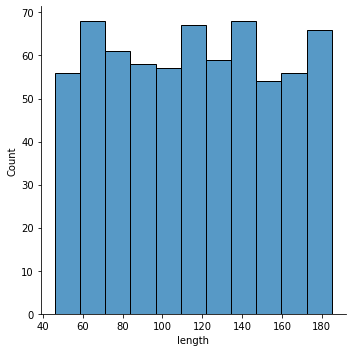

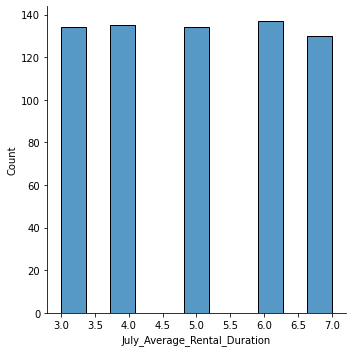

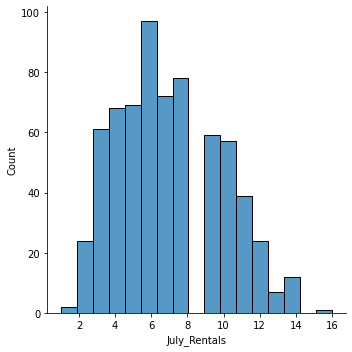

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot distributions for numericals
sns.displot(X_train_num['length'])
plt.show()

#quite uniform

sns.displot(X_train_num['July_Average_Rental_Duration'])
plt.show()

#skewed

sns.displot(X_train_num['July_Rentals'])
plt.show()


In [17]:
# scale numericals
from sklearn.preprocessing import MinMaxScaler   #Best scaler to use for logistical regression
#from sklearn.preprocessing import StandardScaler

# Normalizing data
transformer = MinMaxScaler()
transformer.fit(X_train_num) # For training always use train set. we will reuse this transformer for X_test later
X_train_scaled = transformer.transform(X_train_num)
X_test_scaled  = transformer.transform(X_test_num)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_train_scaled.head()

,length,July_Average_Rental_Duration,July_Rentals
0,0.942446,0.25,0.600000
1,0.467626,0.50,0.133333
2,0.769784,0.75,0.333333
3,0.294964,0.75,0.266667
4,0.122302,0.25,0.466667


In [18]:
# encode categoricals
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first') #Important to set this option to drop one column in order to dummify poss values.
encoder.fit(X_train_cat)
X_train_cat_encoded = encoder.transform(X_train_cat).toarray() #arrays don't have columns/col names
#So below, which are the dummified column names? use get features from X_train_cat dataframe.
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
# Note: in version 1.0 and higher of sklearn this method is called 'get_feature_names_out()'
# we will reuse encoder and cols when encoding the X_test_cat
X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=cols)
X_train_encoded_df.head()

,Category_Animation,Category_Children,Category_Classics,Category_Comedy,Category_Documentary,Category_Drama,Category_Family,Category_Foreign,Category_Games,Category_Horror,Category_Music,Category_New,Category_Sci-Fi,Category_Sports,Category_Travel,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Concatenation of train and scaled numerical, train and encoded categorical
X_train_treated_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)

In [20]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr')
classification.fit(X_train_treated_df, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [21]:
# apply scaler to X_test_num
X_test_scaled = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)
X_test_scaled.head()

,length,July_Average_Rental_Duration,July_Rentals
0,0.446043,0.00,0.800000
1,0.899281,0.00,0.266667
2,0.597122,0.50,0.200000
3,0.712230,0.25,0.600000
4,0.323741,0.25,0.866667


In [22]:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test_df = pd.DataFrame(encoded_test_cat, columns=cols) #dummified cols
onehot_encoded_test_df.head()

,Category_Animation,Category_Children,Category_Classics,Category_Comedy,Category_Documentary,Category_Drama,Category_Family,Category_Foreign,Category_Games,Category_Horror,Category_Music,Category_New,Category_Sci-Fi,Category_Sports,Category_Travel,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# combine scaled and onehot_encoded portions of X_test
X_test_treated_df = pd.concat([X_test_scaled, onehot_encoded_test_df], axis=1)
X_test_treated_df

,length,July_Average_Rental_Duration,July_Rentals,Category_Animation,Category_Children,Category_Classics,Category_Comedy,Category_Documentary,Category_Drama,Category_Family,...,Category_Horror,Category_Music,Category_New,Category_Sci-Fi,Category_Sports,Category_Travel,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.446043,0.00,0.800000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.899281,0.00,0.266667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.597122,0.50,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.712230,0.25,0.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.323741,0.25,0.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.280576,0.25,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
284,0.928058,0.50,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
285,0.517986,0.00,0.200000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
286,0.273381,0.00,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
y_train_pred = classification.predict(X_train_treated_df)
y_test_pred  = classification.predict(X_test_treated_df)
print("The first predictions on the TRAIN set are: ",y_train_pred[:5])
print("The first predictions on the TEST set are: ",y_test_pred[:5])

The first predictions on the TRAIN set are:  [False  True False False False]
The first predictions on the TEST set are:  [False False  True False False]


In [25]:
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

The confusion matrix on the TRAIN set is: 


array([[332,  70],
       [134, 134]])

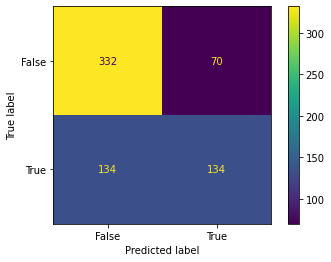

In [26]:
disp = ConfusionMatrixDisplay(cm_train,display_labels=classification.classes_);
disp.plot()
plt.show()

The confusion matrix on the TEST set is: 


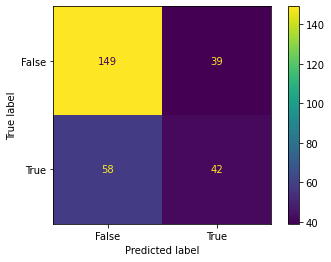

In [27]:
print("The confusion matrix on the TEST set is: ")
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test
disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_);
disp.plot()
plt.show()

In [38]:
# classification.score == accuracy of prediction
# Accuracy score = (TP + TN)/(TP + TN + FP + FN)
print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The accuracy in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_test_pred)))

The accuracy in the TRAIN set is: 0.696
The accuracy in the TEST  set is: 0.663


In [39]:
# Precission score. = TP/(TP + FP)
#If we're using labels instead of numbers for the classes to predict, we need to
# provide what class is the "positive" and which is the "negative"
print("The precission in the TRAIN set is: {:.3f}".format(precision_score(y_train, y_train_pred, pos_label=True)))
print("The precission in the TEST  set is: {:.3f}".format(precision_score(y_train, y_train_pred, pos_label=True)))

The precission in the TRAIN set is: 0.657
The precission in the TEST  set is: 0.657


In [31]:
# Recall score = TP / ( TP + FN)
print("The recall in the TRAIN set is: {:.3f}".format(recall_score(y_train, y_train_pred, pos_label=True)))
print("The recall in the TEST  set is: {:.3f}".format(recall_score(y_test,  y_test_pred, pos_label=True)))

The recall in the TRAIN set is: 0.500
The recall in the TEST  set is: 0.420


In [32]:
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred, pos_label=True)))

#Scales down precision and recall. 

The F1-score for the TRAIN set is 0.57


In [33]:
print("The F1-score for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred, pos_label=True)))

The F1-score for the TEST set is 0.46


In [34]:
print(classification_report(y_train, y_train_pred,target_names=['True','False']))

              precision    recall  f1-score   support

        True       0.71      0.83      0.76       402
       False       0.66      0.50      0.57       268

    accuracy                           0.70       670
   macro avg       0.68      0.66      0.67       670
weighted avg       0.69      0.70      0.69       670



In [35]:
print(classification_report(y_test, y_test_pred,target_names=['True','False']))

              precision    recall  f1-score   support

        True       0.72      0.79      0.75       188
       False       0.52      0.42      0.46       100

    accuracy                           0.66       288
   macro avg       0.62      0.61      0.61       288
weighted avg       0.65      0.66      0.65       288



In [36]:
from sklearn.metrics import cohen_kappa_score

In [37]:
cohen_kappa_score(y_test, y_test_pred)

0.22244488977955912